# Author: Jaden Armstrong
# Date: 11/03/2023
# Name: Problem1_R.ipynb

Read in adult_training data set by URL using readr

In [ ]:
library(readr)
adultTraining_data <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv", show_col_types = FALSE)


First step is data Cleansing

---

Summarize adultTraining_data to investigate the distribution of the numeric value fields as well as see if any null values exist

In [ ]:
summary(adultTraining_data)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

No Null values exist in this data set. Data cleansing for capital-loss and capital-gain is needed

---
Rename columns that include a '-' to avoid issues in later functions used. (The rest of the operators are commented within the code)


In [ ]:
# Rename the column "capital-loss" to "caploss"
colnames(adultTraining_data)[colnames(adultTraining_data) == "capital-loss"] <- "caploss"
# Rename the column "capital-gain" to "capgain"
colnames(adultTraining_data)[colnames(adultTraining_data) == "capital-gain"] <- "capgain"
# Rename the column "martial_status" to "martialstatus"
colnames(adultTraining_data)[colnames(adultTraining_data) == "marital-status"] <- "maritalstatus"

In [ ]:
# Calculate the mean and standard deviation for capital_loss and capital_gain
mean_loss <- mean(adultTraining_data$caploss, na.rm = TRUE)
sd_loss <- sd(adultTraining_data$caploss, na.rm = TRUE)

# mean and standard deviation from capgain
mean_gain <- mean(adultTraining_data$capgain, na.rm = TRUE)
sd_gain <- sd(adultTraining_data$capgain, na.rm = TRUE)

# Identify and replace outliers with NA
adultTraining_data$caploss[abs(adultTraining_data$caploss - mean_loss) > 3 * sd_loss] <- NA
adultTraining_data$capgain[abs(adultTraining_data$capgain - mean_gain) > 3 * sd_gain] <- NA

# Impute NA values with the mean of the new set
adultTraining_data$caploss[is.na(adultTraining_data$caploss)] <- mean(adultTraining_data$caploss, na.rm = TRUE)
adultTraining_data$capgain[is.na(adultTraining_data$capgain)] <- mean(adultTraining_data$capgain, na.rm = TRUE)

Create a contingency table of workclass and sex, and plot it

                  
                   Female Male
  ?                   377  452
  Federal-gov         149  305
  Local-gov           377  592
  Never-worked          1    4
  Private            3574 6707
  Self-emp-inc         54  444
  Self-emp-not-inc    178  992
  State-gov           201  385
  Without-pay           1    4


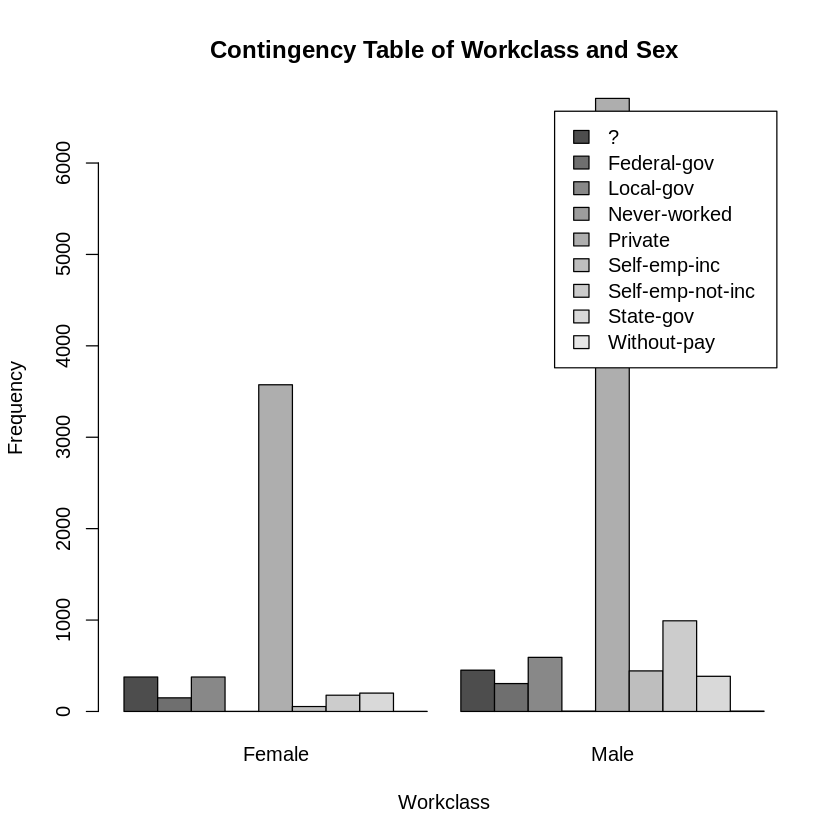

In [ ]:
# Create a contingency table of workclass and sex
contingency_table <- table(adultTraining_data$workclass, adultTraining_data$sex)

# Print the contingency table
print(contingency_table)

# Create a barplot of the contingency table
barplot(contingency_table, beside = TRUE, legend = rownames(contingency_table),
        xlab = "Workclass", ylab = "Frequency", main = "Contingency Table of Workclass and Sex")

Create continegncy table for sex and marital status, and plot it

                       
                        Female Male
  Divorced                1219  795
  Married-AF-spouse          7    4
  Married-civ-spouse       761 6010
  Married-spouse-absent     95  104
  Never-married           2160 2717
  Separated                290  182
  Widowed                  380   73


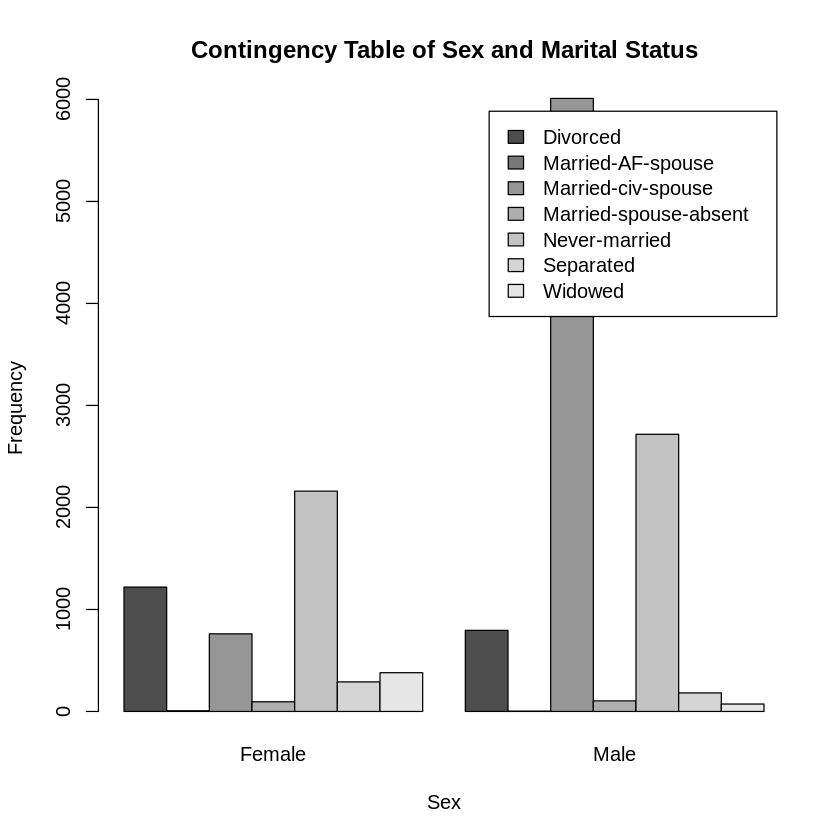

In [ ]:
# Create a contingency table of sex and marital status
contingency_table <- table(adultTraining_data$maritalstatus, adultTraining_data$sex)

# Print the contingency table
print(contingency_table)

# Create a barplot of the contingency table
barplot(contingency_table, beside = TRUE, legend = rownames(contingency_table),
        xlab = "Sex", ylab = "Frequency", main = "Contingency Table of Sex and Marital Status")

Create a new dataframe for adults over 40

In [ ]:
# Create a new data frame 'adultOver40' for individuals with age > 40
adultOver40 <- adultTraining_data[adultTraining_data$age > 40, ]

Recreate a contingency table of sex and martial status for adults over 40

In [ ]:
# Create a contingency table of sex and marital status for adultOver40
contingency_table <- table(adultOver40$sex, adultOver40$maritalstatus)

# Print the contingency table
print(contingency_table)

        
         Divorced Married-civ-spouse Married-spouse-absent Never-married
  Female      720                305                    38           256
  Male        448               3383                    47           315
        
         Separated Widowed
  Female       133     354
  Male          74      71


Determine weather any outliers exist for the education field

In [ ]:
# Calculate summary statistics for the "education" field
summary_education <- summary(adultTraining_data$education)

# Find the median and interquartile range (IQR)
median_education <- median(adultTraining_data$education)
q1_education <- quantile(adultTraining_data$education, 0.25)
q3_education <- quantile(adultTraining_data$education, 0.75)
iqr_education <- q3_education - q1_education

# Calculate potential outlier thresholds
lower_threshold <- q1_education - 1.5 * iqr_education
upper_threshold <- q3_education + 1.5 * iqr_education

# Check for potential outliers
outliers_education <- adultTraining_data$education[adultTraining_data$education < lower_threshold | adultTraining_data$education > upper_threshold]

# Print summary statistics and potential outliers
print(summary_education)
cat("Median:", median_education, "\n")
cat("Lower Threshold:", lower_threshold, "\n")
cat("Upper Threshold:", upper_threshold, "\n")
cat("Potential Outliers:", length(outliers_education), "\n")

# If needed, you can print the potential outlier values themselves
# print(outliers_education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    9.00   10.00   10.07   12.00   16.00 
Median: 10 
Lower Threshold: 4.5 
Upper Threshold: 16.5 
Potential Outliers: 552 


Standardize (zero mean) the age variable, and identify how many outliers there are. Identify the msot extreme outlier

In [ ]:
# Standardize the "age" variable
z_scores <- scale(adultTraining_data$age)

# Identify outliers (values beyond 3 standard deviations from the mean)
outliers <- which(abs(z_scores) > 3)

# Calculate the number of outliers
num_outliers <- length(outliers)

# Find the most extreme outlier
most_extreme_outlier <- adultTraining_data$age[outliers[which.max(abs(z_scores[outliers]))]]

# Print the results
cat("Number of outliers:", num_outliers, "\n")
cat("Most extreme outlier:", most_extreme_outlier, "\n")

Number of outliers: 60 
Most extreme outlier: 90 


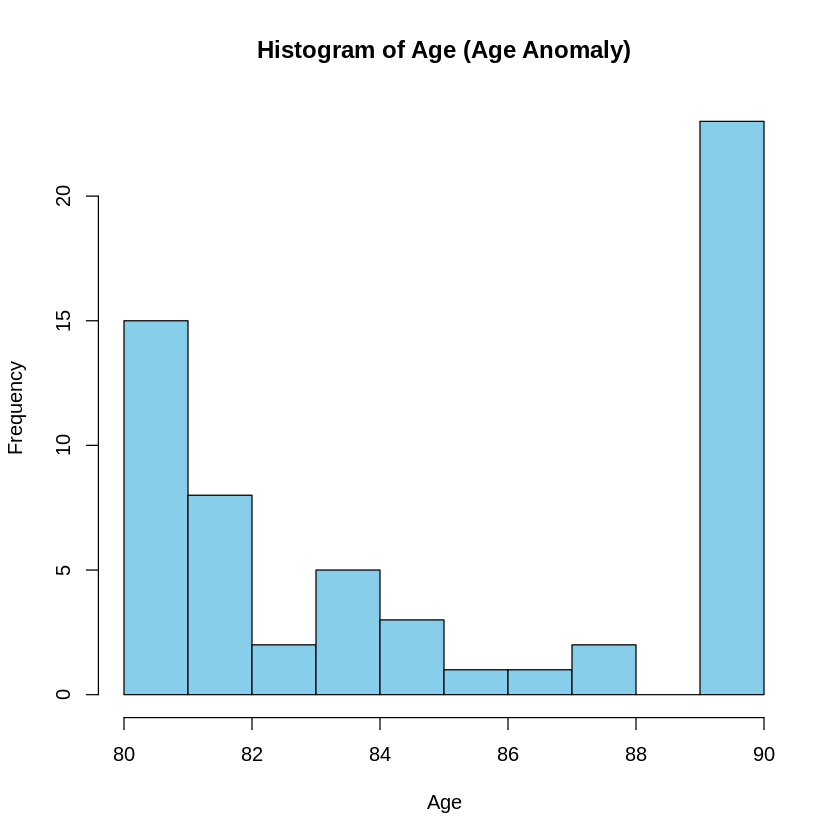

In [ ]:
# Select records with age at least 80
age_anomaly_data <- adultTraining_data[adultTraining_data$age >= 80, ]

# Create a histogram of age
hist(age_anomaly_data$age,
     main = "Histogram of Age (Age Anomaly)",
     xlab = "Age",
     ylab = "Frequency",
     col = "skyblue",
     border = "black",
     breaks = seq(80, 90, length.out = 11))

There seems to be a general decline in frequency of individuals over 80 as each year in age increases, other than age 90. In addition, there seems to be no records of individuals 89 years old.

---

In conclusion, it is important to standardize the numeric values as it makes it much easier to identify outliers. Although for certain values, like age, when trying to plot the records of individuals above a specific age, it is easier to use the unchanged age value. For education, no outliers existed in the dataframe for individuals above 40. This was discovered with a manual calculation and did not need a query. Lastly, as previously mentioned, there were no records of individuals aged 89 while a abnormaly high frequency of individuals aged 90.